# Updation from week 2 ipynb notebook.
As of last time where we had found the xml feed link for the Top 100 webpages and Blog for our project.
And we have updated it to FeedUrl.txt
But unlike last time where we started to extract features from these feeds.
This time we try to validate the feed url we have got.
##### This cannot be vied in this notebook because it is manually tested for every feed one by one.
The feeds are recivied and stored in ValidatedFeed.txt, if it is suitable for the project goal it will be kept.
This is being checked because:
   * most of the feeds have changed over time, where the updation isn't every often.
   * Also there were Feed which didnt have Published date, which is very important for the project.
   * Some where paid to view/extract.

These things gets cleaned off.

In [117]:
#pip3 install feedparser 
#feedparser to get the XML document.
#The XML feed is stored in ValidateFeed.xml and will be checked.

import feedparser
import pandas as pd

pd.set_option("display.max_rows", None) #just to display all the rows
pd.set_option('display.max_colwidth', None) #incearse column width in dataFrame

In [118]:

data = pd.DataFrame(columns=["URL","Topic","Date"])

# open FeedUrl and make a list of all the urls in the file
try:
    with open('FeedUrl.txt','r') as f:
        urls = f.read()
        urls = urls.split("\n")
        urls.pop()                # Last line contains "\n" so its popped out 
except:
    TypeError("Feed URLs File access error")
    pass

for url in urls:
    try:
        feed = feedparser.parse(url)
        for entry in feed.entries:
            try:
                data.loc[len(data.index)] = [url,entry.title,entry.published]
            except:
                TypeError("Error in Feed parsing")
                pass
    except:
        TypeError("Error in Feed access")
data

URL  \
0                                                                     https://towardsdatascience.com/feed   
1                                                                     https://towardsdatascience.com/feed   
2                                                                     https://towardsdatascience.com/feed   
3                                                                     https://towardsdatascience.com/feed   
4                                                                     https://towardsdatascience.com/feed   
5                                                                     https://towardsdatascience.com/feed   
6                                                                     https://towardsdatascience.com/feed   
7                                                                     https://towardsdatascience.com/feed   
8                                                                     https://towardsdatascience.com/feed   
9                                                                     https://towardsdatascience.com/feed   
10                                                                  https://www.analyticsvidhya.com/feed/   
11                                                                  https://www.analyticsvidhya.com/feed/   
12                                                                  https://www.analyticsvidhya.com/feed/   
13                                                                  https://www.analyticsvidhya.com/feed/   
14                                                                  https://www.analyticsvidhya.com/feed/   
15                                                                  https://www.analyticsvidhya.com/feed/   
16                                                                  https://www.analyticsvidhya.com/feed/   
17                                                                  https://www.analyticsvidhya.com/feed/   
18                                                                  https://www.analyticsvidhya.com/feed/   
19                                                                  https://www.analyticsvidhya.com/feed/   
20                                                             https://fivethirtyeight.com/features/feed/   
21                                                             https://fivethirtyeight.com/features/feed/   
22                                                             https://fivethirtyeight.com/features/feed/   
23                                                             https://fivethirtyeight.com/features/feed/   
24                                                             https://fivethirtyeight.com/features/feed/   
25                                                             https://fivethirtyeight.com/features/feed/   
26                                                             https://fivethirtyeight.com/features/feed/   
27                                                             https://fivethirtyeight.com/features/feed/   
28                                                             https://fivethirtyeight.com/features/feed/   
29                                                             https://fivethirtyeight.com/features/feed/   
30                                                             https://fivethirtyeight.com/features/feed/   
31                                                             https://fivethirtyeight.com/features/feed/   
32                                                             https://fivethirtyeight.com/features/feed/   
33                                                             https://fivethirtyeight.com/features/feed/   
34                                                             https://fivethirtyeight.com/features/feed/   
35                                                             https://fivethirtyeight.com/features/feed/   
36                                                             https:

In [120]:
df=data.set_index(['URL',"Topic"])  #also can use groupby method
df

Date
URL                                                                                                 Topic                                                                                                                                                                                                                                                                                                       
https://towardsdatascience.com/feed                                                                 OpenAI PALMS — Adapting GPT-3 to Society                                                                                                                                                                                                                                       Sat, 12 Jun 2021 05:45:25 GMT
                                                                                                    How My Learning Path Changed After Becoming a Data Scientist                                                                                                                                                                                                                   Sat, 12 Jun 2021 05:35:24 GMT
                                                                                                    Raspberry Pi Gardening: Monitoring a Vegetable Garden using a Raspberry Pi — Part 1                                                                                                                                                                                            Sat, 12 Jun 2021 05:34:04 GMT
                                                                                                    Simulating Real-Life Events in Python with SimPy                                                                                                                                                                                                                               Sat, 12 Jun 2021 05:18:42 GMT
                                                                                                    Powerful Text Augmentation using NLPAUG !                                                                                                                                                                                                                                      Sat, 12 Jun 2021 05:12:16 GMT
                                                                                                    A Graphical Explanation of RoC and AUC                                                                                                                                                                                                                                         Sat, 12 Jun 2021 05:02:24 GMT
                                                                                                    Using Machine Learning to Understand League of Legends                                                                                                                                                                                                                         Fri, 11 Jun 2021 20:32:07 GMT
                                                                                                    Air Piano using OpenCV and Python                                                                                                                                                                                                                                              Fri, 11 Jun 2021 20:31:54 GMT
                                                                                                    In defense of statistical modeling                                                                                                                                                                                                                                             Fri, 11 Jun 202

Now the ValidatedFeedUrl.txt contains the all the neccessary urls required for the project.                         
As in FeedUrl.txt the valid Urls have reduced to half in ValidatedFeedUrl.                                         
Next we Parse it according to our needs.

In [121]:
validated_df = pd.DataFrame(columns=["WebName","Topic","Year","Month","Day","Hour"])

try:
    with open("ValidatedFeedUrl.txt","r") as f:
        Urls = f.read()
        Urls = Urls.split("\n")
except:
    TypeError("Validated URLs File access error")
    pass

for url in Urls:
    feed = feedparser.parse(url)
    Name = url.split("/")[2]
    for entry in feed.entries:
        Title = entry.title
        Year = entry.published_parsed.tm_year
        Month = entry.published_parsed.tm_mon
        Day = entry.published_parsed.tm_mday
        Hour = entry.published_parsed.tm_hour
        validated_df.loc[len(validated_df.index)] = [Name,Title,Year,Month,Day,Hour]

validated_df

WebName  \
0                      towardsdatascience.com   
1                      towardsdatascience.com   
2                      towardsdatascience.com   
3                      towardsdatascience.com   
4                      towardsdatascience.com   
5                      towardsdatascience.com   
6                      towardsdatascience.com   
7                      towardsdatascience.com   
8                      towardsdatascience.com   
9                      towardsdatascience.com   
10                    www.analyticsvidhya.com   
11                    www.analyticsvidhya.com   
12                    www.analyticsvidhya.com   
13                    www.analyticsvidhya.com   
14                    www.analyticsvidhya.com   
15                    www.analyticsvidhya.com   
16                    www.analyticsvidhya.com   
17                    www.analyticsvidhya.com   
18                    www.analyticsvidhya.com   
19                    www.analyticsvidhya.com   
20                                www.ibm.com   
21                                www.ibm.com   
22                                www.ibm.com   
23                                www.ibm.com   
24                                www.ibm.com   
25                                www.ibm.com   
26                                www.ibm.com   
27                                www.ibm.com   
28                                www.ibm.com   
29                                www.ibm.com   
30                          www.kdnuggets.com   
31                          www.kdnuggets.com   
32                          www.kdnuggets.com   
33                          www.kdnuggets.com   
34                          www.kdnuggets.com   
35                          www.kdnuggets.com   
36                          www.kdnuggets.com   
37                          www.kdnuggets.com   
38                          www.kdnuggets.com   
39                          www.kdnuggets.com   
40                          www.kdnuggets.com   
41                          www.kdnuggets.com   
42                          www.kdnuggets.com   
43                          www.kdnuggets.com   
44                          www.kdnuggets.com   
45                          www.kdnuggets.com   
46                          www.kdnuggets.com   
47                          www.kdnuggets.com   
48                          www.kdnuggets.com   
49                          www.kdnuggets.com   
50                          www.kdnuggets.com   
51                          www.kdnuggets.com   
52                          www.kdnuggets.com   
53                          www.kdnuggets.com   
54                          www.kdnuggets.com   
55                          www.kdnuggets.com   
56                          www.kdnuggets.com   
57                          www.kdnuggets.com   
58                          www.kdnuggets.com   
59                          www.kdnuggets.com   
60                          www.kdnuggets.com   
61                          www.kdnuggets.com   
62                          www.kdnuggets.com   
63                          www.kdnuggets.com   
64                          www.kdnuggets.com   
65                          www.kdnuggets.com   
66                          www.kdnuggets.com   
67                          www.kdnuggets.com   
68                          www.kdnuggets.com   
69                          www.kdnuggets.com   
70                          www.kdnuggets.com   
71                          www.kdnuggets.com   
72                          www.kdnuggets.com   
73                          www.kdnuggets.com   
74                          www.kdnuggets.com   
75                          www.kdnuggets.com   
76                          www.kdnuggets.com   
77                          www.kdnuggets.com   
78                          www.kdnuggets.com   
79                          www.kdnuggets.com   
80                          www.kdnuggets.com   
81                  

In [122]:
validated_df[["Year","Month","Day","Hour"]].astype(int)
df = validated_df.loc[validated_df["Year"]>2004] # Saving Data only from year 2005
df.reset_index(inplace=True)
df = df.drop("index",axis=1)
df

WebName  \
0                      towardsdatascience.com   
1                      towardsdatascience.com   
2                      towardsdatascience.com   
3                      towardsdatascience.com   
4                      towardsdatascience.com   
5                      towardsdatascience.com   
6                      towardsdatascience.com   
7                      towardsdatascience.com   
8                      towardsdatascience.com   
9                      towardsdatascience.com   
10                    www.analyticsvidhya.com   
11                    www.analyticsvidhya.com   
12                    www.analyticsvidhya.com   
13                    www.analyticsvidhya.com   
14                    www.analyticsvidhya.com   
15                    www.analyticsvidhya.com   
16                    www.analyticsvidhya.com   
17                    www.analyticsvidhya.com   
18                    www.analyticsvidhya.com   
19                    www.analyticsvidhya.com   
20                                www.ibm.com   
21                                www.ibm.com   
22                                www.ibm.com   
23                                www.ibm.com   
24                                www.ibm.com   
25                                www.ibm.com   
26                                www.ibm.com   
27                                www.ibm.com   
28                                www.ibm.com   
29                                www.ibm.com   
30                          www.kdnuggets.com   
31                          www.kdnuggets.com   
32                          www.kdnuggets.com   
33                          www.kdnuggets.com   
34                          www.kdnuggets.com   
35                          www.kdnuggets.com   
36                          www.kdnuggets.com   
37                          www.kdnuggets.com   
38                          www.kdnuggets.com   
39                          www.kdnuggets.com   
40                          www.kdnuggets.com   
41                          www.kdnuggets.com   
42                          www.kdnuggets.com   
43                          www.kdnuggets.com   
44                          www.kdnuggets.com   
45                          www.kdnuggets.com   
46                          www.kdnuggets.com   
47                          www.kdnuggets.com   
48                          www.kdnuggets.com   
49                          www.kdnuggets.com   
50                          www.kdnuggets.com   
51                          www.kdnuggets.com   
52                          www.kdnuggets.com   
53                          www.kdnuggets.com   
54                          www.kdnuggets.com   
55                          www.kdnuggets.com   
56                          www.kdnuggets.com   
57                          www.kdnuggets.com   
58                          www.kdnuggets.com   
59                          www.kdnuggets.com   
60                          www.kdnuggets.com   
61                          www.kdnuggets.com   
62                          www.kdnuggets.com   
63                          www.kdnuggets.com   
64                          www.kdnuggets.com   
65                          www.kdnuggets.com   
66                          www.kdnuggets.com   
67                          www.kdnuggets.com   
68                          www.kdnuggets.com   
69                          www.kdnuggets.com   
70                          www.kdnuggets.com   
71                          www.kdnuggets.com   
72                          www.kdnuggets.com   
73                          www.kdnuggets.com   
74                          www.kdnuggets.com   
75                          www.kdnuggets.com   
76                          www.kdnuggets.com   
77                          www.kdnuggets.com   
78                          www.kdnuggets.com   
79                          www.kdnuggets.com   
80                          www.kdnuggets.com   
81                  

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

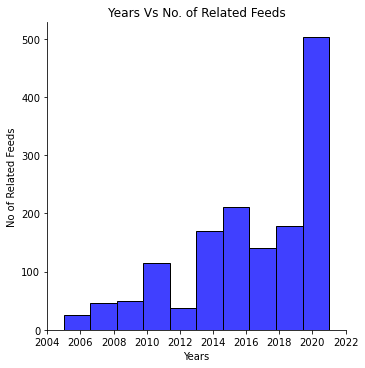

In [124]:
sns.displot(df["Year"],bins=10,color="b",kde=False)
plt.title("Years Vs No. of Related Feeds")
plt.xlabel("Years")
plt.xlim(xmin=2004,xmax=2022)
plt.ylabel("No of Related Feeds")
plt.show()

In [125]:
# making files for last 17 years.

for i in range(2005,2022,1):
    df[df["Year"]==i].to_csv("File{}".format(i),index=False)

df.to_csv("Entire_data",index=False)

### NLP

In [126]:
# if using nltk 1st time then un-comment the below lines
# !pip3 install nltk
# import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')

In [127]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import wordnet
from yake import yake

In [128]:
def is_not_numeric(x):
    try:
        float(x)
        return False
    except:
        return True

doc = ""

for sentence in df["Topic"]:
    doc += sentence+" "

word = word_tokenize(doc)
stop_words = set(stopwords.words("english"))
words = [x for x in word if (x not in stop_words and len(x)>1 and is_not_numeric(x))]

token_word = ""
stem_word = ""
lemma_word = ""

stemmer = PorterStemmer()
lemmar = wordnet.WordNetLemmatizer()

for word in words:
    token_word += str(word) + " "
    stem_word += stemmer.stem(word)+" "
    lemma = lemmar.lemmatize(word)
    lemma_word += lemma+" "

###### Implementing Key-Pharsing after tokenization and without stemmming

In [129]:

tokenizied_extractor = yake.KeywordExtractor(lan="en", n=2, dedupLim=0.9, dedupFunc="seqm", windowsSize=1, top=100, features=None)
keywords = tokenizied_extractor.extract_keywords(token_word)

for kw in sorted(keywords):
    print(kw)

('ARIMA Models', 0.0008859274434551983)
('Analytics', 0.0006757820441325161)
('Analytics Data', 0.00017166682231201533)
('Analytics Jobs', 0.0009341481291851675)
('Apply Data', 0.0008465988491606996)
('Automatic time', 0.001077823369351727)
('Azure Data', 0.0008957852141603457)
('Big Data', 0.00018336683201559725)
('Business Analytics', 0.00029106053980122455)
('Data', 6.687370771410978e-05)
('Data Analyst', 0.0009586972773757657)
('Data Analytics', 9.809532703543733e-05)
('Data Careers', 0.0006033066181304396)
('Data Data', 0.0001907269853676213)
('Data Engineer', 0.00040713090972433423)
('Data Fluency', 0.0004416773819239088)
('Data Governance', 0.0010442083367603612)
('Data Job', 0.001037322128266772)
('Data Machine', 0.0006004555226134932)
('Data Python', 0.0007502669605071069)
('Data Science', 1.3020222253529434e-05)
('Data Scientist', 5.6928579028860274e-05)
('Data Simple', 0.0002593623529522666)
('Data Skills', 0.0006892961675821218)
('Data Storytelling', 0.0004416773819239088)


###### Implementing Key-Pharsing after Tokenization and Stemming(using Lancaster)

In [130]:

stem_extractor = yake.KeywordExtractor(lan="en", n=2, dedupLim=0.9, dedupFunc="seqm", windowsSize=1, top=100, features=None)
keywords = stem_extractor.extract_keywords(stem_word)

for kw in sorted(keywords):
    print(kw)

('addit model', 0.0020674823690207535)
('analysi', 0.0026237987554750646)
('analysi time', 0.002581214282403637)
('analyt', 0.0016755707217270032)
('analyt data', 0.0013144911504856952)
('arima model', 0.0018395223761580141)
('automat time', 0.0019521531124245145)
('becom data', 0.001844415158768316)
('big data', 0.000798490313772442)
('big time', 0.0009652280188780593)
('busi analyt', 0.0017923457361413372)
('data', 0.0001875511213627184)
('data analysi', 0.00034314251421485825)
('data analyt', 0.0006572455752428476)
('data career', 0.0022421159877665923)
('data data', 0.0015041097605385176)
('data engin', 0.00208511998843926)
('data fluenci', 0.0029758169938311515)
('data forecast', 0.0008677754191615113)
('data learn', 0.0018012437500083594)
('data manag', 0.0011714287578324326)
('data mine', 0.0010379802487834587)
('data model', 0.0007404181614902584)
('data scienc', 9.28788823830966e-05)
('data scientist', 0.00030613635413202333)
('data simpl', 0.0018078417186596716)
('data statis

###### Implementing Key-Pharing after Tokenization and Lemmatization (in place of stemming)

In [131]:

lemma_extractor = yake.KeywordExtractor(lan="en", n=2, dedupLim=0.9, dedupFunc="seqm", windowsSize=1, top=100, features=None)
keywords = lemma_extractor.extract_keywords(lemma_word)

for kw in sorted(keywords):
    print(kw)

('ARIMA model', 0.0008860762290857832)
('Analytics', 0.0006758282618975187)
('Analytics Data', 0.00017169209865259562)
('Apply Data', 0.0008467020878742335)
('Automatic time', 0.0010780558241792707)
('Azure Data', 0.0008958887873587349)
('Big Data', 0.00018339727509360148)
('Business Analytics', 0.0002910981907052247)
('Data', 6.687897353199129e-05)
('Data Analyst', 0.0009588064204676892)
('Data Analytics', 9.810977065862606e-05)
('Data Careers', 0.0006033840663653109)
('Data Data', 0.0001907570347346695)
('Data Engineer', 0.00040717688080159576)
('Data Fluency', 0.00044173093383139474)
('Data Governance', 0.0010443189415115495)
('Data Job', 0.0010374792186425078)
('Data Machine', 0.000600547233952681)
('Data Python', 0.0007503713519111296)
('Data Science', 1.302222328331718e-05)
('Data Scientist', 5.693683173509465e-05)
('Data Simple', 0.00025939768586574606)
('Data Skills', 0.0006893819514355766)
('Data Storytelling', 0.00044173093383139474)
('Data Visualization', 0.00022142539540860